In [1]:
import PyQt5
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Constants

In [2]:
k = 9e+9 # electric force constant
eps= 1e-18 # very small number

# Electrostatic fields

In [49]:
# Potential field
def phi_field (n, charges):
    
    x,y = np.mgrid[0:n[0], 0:n[1]]
    phi = np.zeros(n)
    
    for i in range(charges.shape[0]):
        xi = np.tile(charges[i,1], np.prod(n)).reshape(x.shape)
        yi = np.tile(charges[i,2], np.prod(n)).reshape(y.shape)
        phi += charges[i,0]/(np.hypot((x-xi), (yi-y))+eps)
        phi[int(charges[i,1]), int(charges[i,2])] *= eps
        
        
    return x, y, phi
    

# Plotting

In [66]:
def plot_E (x, y, Ex, Ey, k = 1):

    plt.axes([0.025, 0.025, 0.95, 0.95])

    plt.quiver(x[::k, ::k], y[::k, ::k], Ex[::k], Ey[::k], facecolor='None', linewidth=.5)

    plt.xlim(-1, n[0])
    plt.xticks(())
    plt.ylim(-1, n[1])
    plt.yticks(())

    plt.show()

# Simulation

In [67]:
n = (100, 100)

In [68]:
charges = np.ones((2,3))
charges.shape

(2L, 3L)

In [69]:
charges[0,1:] = np.array([ 25,  50])
charges[1,1:] = np.array([ 75,  50])

In [70]:
x,y,z = phi_field(n, charges)

In [77]:
z[25,50]

1.0199999999999998

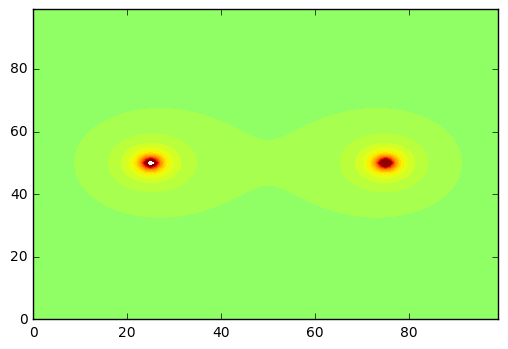

In [72]:
plt.figure()
levels = np.linspace(-1, 1, 40)
plt.contourf(x, y, z, levels=levels)
plt.show()

In [73]:
Ex,Ey = np.gradient(z)

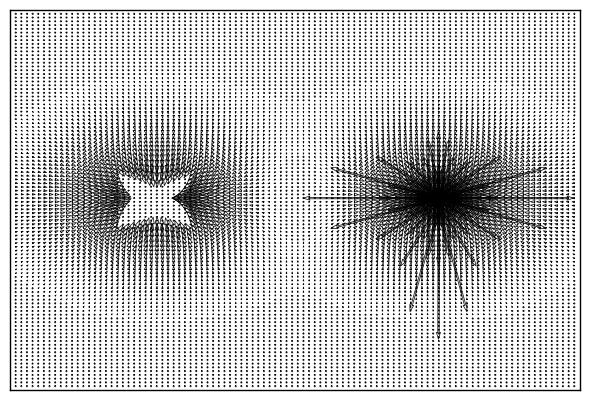

In [83]:
plot_E(x,y,Ex,Ey)

In [82]:
Ex[18:32,42:58] = 0
Ey[18:32,42:58] = 0
Ex[73:78,47:53] = 0
Ey[73:78,47:53] = 0

In [236]:
charges[0,2]

5.0

In [84]:
Ex.shape

(100L, 100L)